In [1]:
%matplotlib inline

import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

plt.rcParams.keys()
plt.rc('font', family='serif')
params = {
   'axes.labelsize': 30,
   'axes.linewidth': 1.5,
   'legend.fontsize': 25,
   'legend.frameon': False,
   'lines.linewidth': 2,
   'xtick.direction': 'in',
   'xtick.labelsize': 25,
   'xtick.major.bottom': True,
   'xtick.major.pad': 10,
   'xtick.major.size': 10,
   'xtick.major.width': 1,
   'xtick.minor.bottom': True,
   'xtick.minor.pad': 3.5,
   'xtick.minor.size': 5,
   'xtick.minor.top': True,
   'xtick.minor.visible': True,
   'xtick.minor.width': 1,
   'xtick.top': True,
   'ytick.direction': 'in',
   'ytick.labelsize': 25,
   'ytick.major.pad': 10,
   'ytick.major.size': 10,
   'ytick.major.width': 1,
   'ytick.minor.pad': 3.5,
   'ytick.minor.size': 5,
   'ytick.minor.visible': True,
   'ytick.minor.width': 1,
   'ytick.right': True,
   'figure.figsize': [10,10], # instead of 4.5, 4.5
   'savefig.format': 'eps',
   }
plt.rcParams.update(params)

In [2]:
from os import listdir
from os.path import isfile, join
onlyfiles = [f for f in listdir('./') if isfile(join('./', f))]

In [3]:
df=pd.read_table(onlyfiles[0],delimiter=',')
df
#print(min(df['DP']),min(df['Dnu']))

,ID,M_H,TEFF,LOGG,Prot_y,VSINI,M_H_err,TEFF_err,LOGG_err,Prot_y_err,VSINI_err,chisq
0,2M05133961+2432523,-0.218960,4365.859749,4.741798,36.782511,5.097627,0.071321,0.035213,0.143161,0.294764,0.043292,16811.588769
1,2M05134946+2427371,-0.109327,4003.398772,4.740954,21.699460,7.066093,0.062695,0.024168,0.116091,0.231527,0.040327,18806.155552
2,2M05140155+2442356,-0.162537,3702.702264,4.711076,23.108800,4.452650,0.057524,0.016592,0.094232,0.195800,0.031956,18102.187078
3,2M05140298+2451030,0.080965,4257.920411,4.848515,20.942415,5.034881,0.060022,0.029923,0.124970,0.236239,0.043102,17730.181532
4,2M05140311+2457006,-0.176370,4424.426203,4.503695,3.406118,25.614354,0.080588,0.032056,0.160258,0.234928,0.075963,14303.207334
...,...,...,...,...,...,...,...,...,...,...,...,...
315,2M05255933+2415527,0.095521,4523.298032,4.422006,46.620825,5.900575,0.070030,0.039700,0.145336,0.312496,0.042626,16476.718883
316,2M05260373+2409387,-0.073595,4612.873188,4.850070,24.732146,9.359325,0.065198,0.039399,0.132934,0.298969,0.050870,20115.620355
317,2M05261382+2436418,-0.131909,6159.242368,4.407730,13.199569,6.728258,0.084974,0.032356,0.085388,0.187740,0.027928,12075.496926
318,2M05261550+2404454,0.086000,5352.203606,4.547675,34.247564,2.593608,0.048224,0.029513,0.070149,0.158583,0.021416,9341.577759


In [4]:
for i in range(1,len(onlyfiles)):
    if 'ipynb' not in onlyfiles[i]:
        dfnew=pd.read_table(onlyfiles[i],delimiter=',')
        frames = [df, dfnew]
        df = pd.concat(frames)

In [5]:
df.columns=['ID', 'M_H_cannon', 'TEFF_cannon', 'LOGG_cannon', 'Prot_cannon', 
            'VSINI_cannon', 'M_H_err_cannon', 'TEFF_err_cannon','LOGG_err_cannon', 
            'Prot_err_cannon', 'VSINI_err_cannon', 'chisq_cannon']

In [6]:
# merge with apogee
df_apogee=pd.read_pickle('/Users/lucy/Desktop/ASTR/Columbia/GalacticArch/APOGEE.pkl')
#df_apogee
df_CM=pd.merge(df,df_apogee,left_on='ID',right_on='APOGEE_ID',how='inner')


In [7]:
print(np.shape(df))
print(np.shape(df_CM))
df_CM=df_CM.drop_duplicates(subset='ID',keep='first').reset_index(drop=True)
print(np.shape(df_CM))

(363685, 12)
(459255, 214)
(333025, 214)


In [8]:
# get rid of flagged ones
df_CM['FLAGREAD']=[i&2**23 for i in df_CM.ASPCAPFLAG]
df_CM=df_CM.loc[df_CM['FLAGREAD']==0].reset_index(drop=True)
print(np.shape(df_CM))

(313495, 215)


In [9]:
df_CM

,ID,M_H_cannon,TEFF_cannon,LOGG_cannon,Prot_cannon,VSINI_cannon,M_H_err_cannon,TEFF_err_cannon,LOGG_err_cannon,Prot_err_cannon,...,GAIA_PHOT_BP_MEAN_MAG,GAIA_PHOT_RP_MEAN_MAG,GAIA_RADIAL_VELOCITY,GAIA_RADIAL_VELOCITY_ERROR,GAIA_R_EST,GAIA_R_LO,GAIA_R_HI,TEFF_SPEC,LOGG_SPEC,FLAGREAD
0,2M05134946+2427371,-0.109327,4003.398772,4.740954,21.699460,7.066093,0.062695,0.024168,0.116091,0.231527,...,19.713274,17.439272,-9999.000000,-9999.000000,1262.219047,805.826041,2349.177508,3970.699951,4.4733,0
1,2M05140368+2446333,-0.150518,4146.471503,4.734658,27.638903,7.338780,0.040758,0.016457,0.076405,0.157535,...,18.886364,16.734015,-9999.000000,-9999.000000,620.765713,542.638070,724.551125,4048.500000,4.4126,0
2,2M05140700+2405000,-0.488531,5994.197041,4.331068,22.279253,7.278126,0.086138,0.030259,0.076516,0.147059,...,15.416744,14.005527,-9999.000000,-9999.000000,963.737431,930.918372,998.908021,5800.000000,4.1454,0
3,2M05140823+2457264,-0.271510,4003.105383,4.750688,32.134864,7.037676,0.057015,0.020342,0.098628,0.203994,...,19.502195,17.251404,-9999.000000,-9999.000000,892.017183,746.648740,1104.763094,3953.899902,4.4555,0
4,2M05141020+2424187,0.078957,5463.524722,4.667827,8.726121,5.347848,0.039507,0.025728,0.055309,0.113007,...,16.548143,15.014010,-9999.000000,-9999.000000,671.168612,637.546135,708.461106,5432.299805,4.7437,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
313490,2M15360163+4337580,-0.093804,5997.729008,4.290627,17.165114,5.566871,0.064224,0.027960,0.068477,0.157404,...,12.265895,11.540888,-7.476774,1.029775,362.616064,359.842468,365.431973,6088.000000,4.3886,0
313491,2M15360188+4356126,0.082372,4712.072358,4.801568,24.415243,3.997307,0.031245,0.020555,0.066703,0.136088,...,14.908992,13.548276,-9999.000000,-9999.000000,328.318785,326.206342,330.458272,4594.799805,4.5071,0
313492,2M15361301+4310171,0.071758,4730.288452,3.354085,62.539874,2.382394,0.020171,0.009982,0.029516,0.052508,...,11.531970,10.258793,-0.781529,0.302650,811.106164,795.287567,827.554751,4598.100098,2.8493,0
313493,2M15365094+4251353,-0.326346,5713.350968,3.661370,32.262446,6.620366,0.079665,0.029253,0.081152,0.146767,...,14.239708,13.174347,-9999.000000,-9999.000000,5185.652066,4770.041151,5673.009982,5057.600098,2.7899,0


In [10]:
labels=['M_H_cannon', 'TEFF_cannon', 'LOGG_cannon', 'Prot_cannon', 
            'VSINI_cannon', 'M_H_err_cannon', 'TEFF_err_cannon','LOGG_err_cannon', 
            'Prot_err_cannon', 'VSINI_err_cannon']
labels_norm=['M_H', 'TEFF', 'LOGG', 'Prot', 'VSINI']

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1161ad7f0>,
      dtype=object)

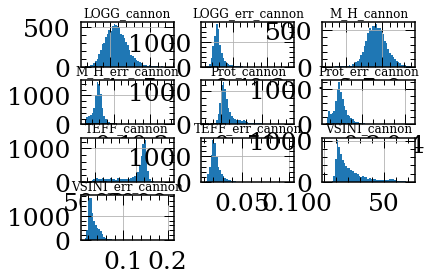

In [11]:
df_CM=df_CM.loc[df_CM['LOGG_cannon']>-10].reset_index(drop=True)
df_CM=df_CM.loc[df_CM['chisq_cannon']<100000].reset_index(drop=True)

df_CM=df_CM.loc[abs(df_CM['M_H'])<0.4].reset_index(drop=True)

df_CM=df_CM.loc[abs(df_CM['TEFF'])<6500].reset_index(drop=True)
df_CM=df_CM.loc[abs(df_CM['TEFF'])>4800].reset_index(drop=True)

df_CM=df_CM.loc[abs(df_CM['LOGG'])<5].reset_index(drop=True)
df_CM=df_CM.loc[abs(df_CM['LOGG'])>3.5].reset_index(drop=True)

df_CM=df_CM.loc[abs(df_CM['VSINI'])<70].reset_index(drop=True)
df_CM=df_CM.loc[abs(df_CM['VSINI'])>10].reset_index(drop=True)
df_CM[labels].hist(bins=50)
#plt.tight_layout()

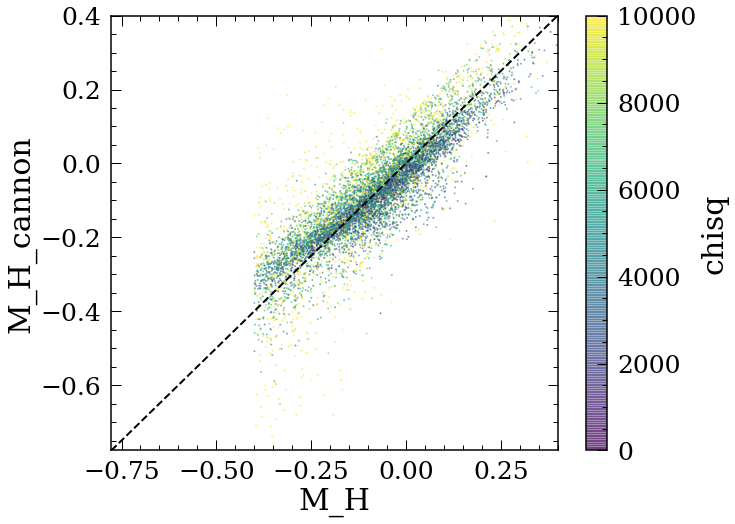

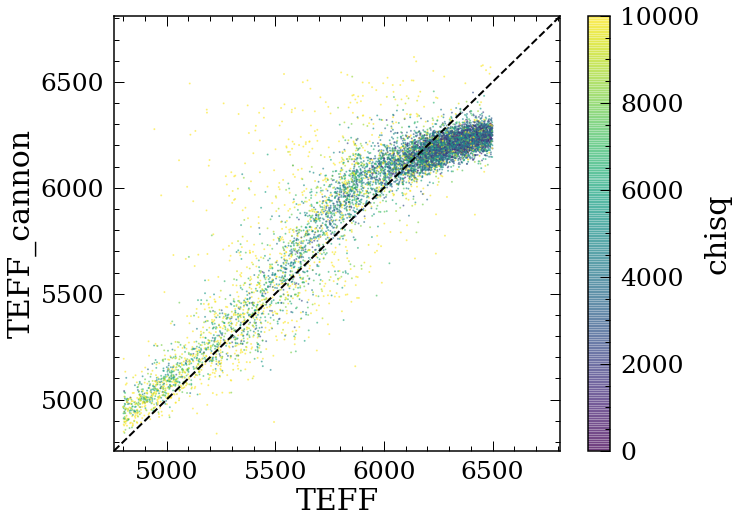

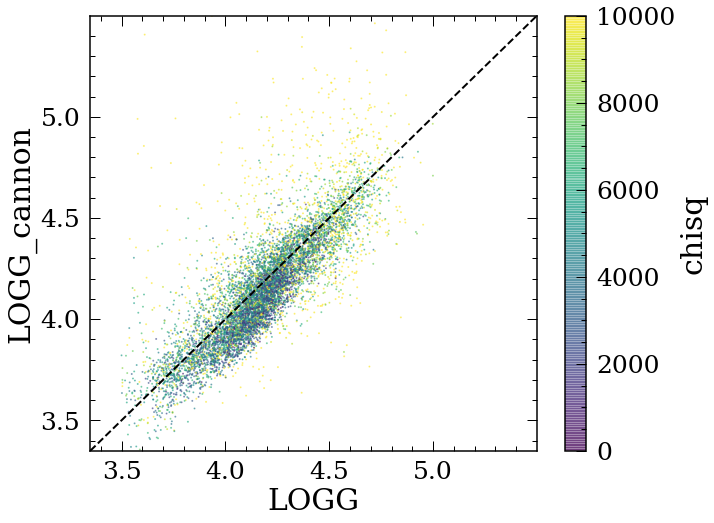

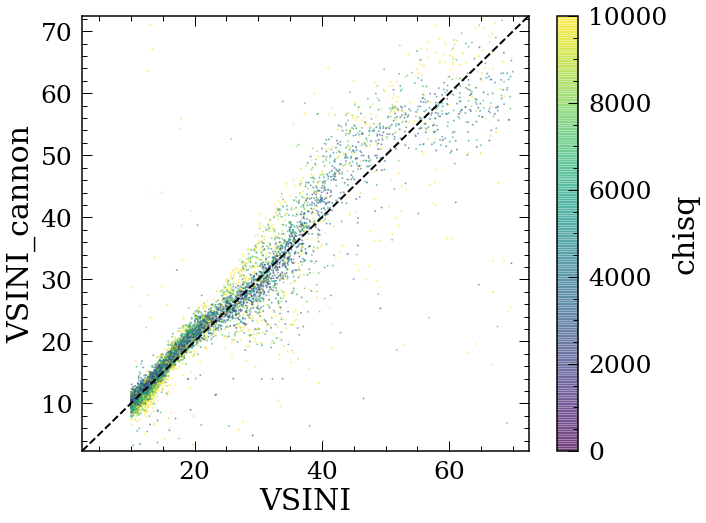

In [12]:
for i in labels_norm:
    if i == 'Prot':
        continue
    plt.figure(figsize=(10,8))
    plt.scatter(df_CM[i],df_CM[i+'_cannon'],c=df_CM['chisq_cannon'],alpha=0.5,s=1,vmin=0,vmax=10000)
    lims=[min(min(df_CM[i]),min(df_CM[i+'_cannon'])),max(max(df_CM[i]),max(df_CM[i+'_cannon']))]
    plt.plot(lims,lims,'k--')
    plt.ylim(lims)
    plt.xlim(lims)
    plt.xlabel(i)
    plt.ylabel(i+'_cannon')
    cb=plt.colorbar()
    cb.set_label('chisq')



In [82]:
from matplotlib.colors import ListedColormap, LinearSegmentedColormap
colors=np.array([[133,95,76,256],[183,167,155,256],[55,36,33,256],[133,95,76,256],[133,95,76,256],[55,36,33,256],
                 [183,167,155,256],[133,95,76,256]])/256

viridis = plt.cm.get_cmap('viridis', 256)
newcolors = viridis(np.linspace(0, 1, 256))

each=int(256/len(colors))
for i in range(len(colors)):
    if i!=len(colors)-1:
        #print(i*each,(i+1)*each)
        newcolors[i*each:(i+1)*each,:]=colors[i,:]
    else:
        #print((i)*each,256)
        newcolors[(i)*each:256,:]=colors[-1,:]

newcmp = ListedColormap(newcolors, name='bernie_mittens')


Text(0, 0.5, 'Prot')

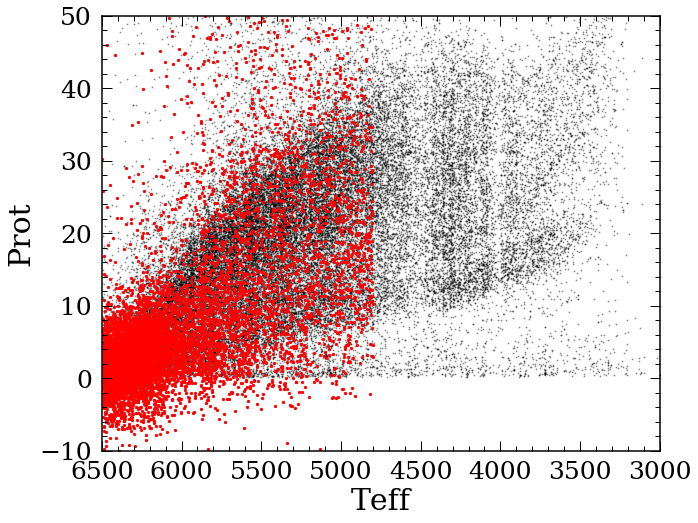

In [90]:
allprot=pd.read_pickle('../../Data/keplerProt.pkl')
plt.figure(figsize=(10,8))
plt.scatter(allprot['Teff'],allprot['Prot'],c='k',s=1,alpha=0.3)
plt.scatter(df_CM['TEFF'],df_CM['Prot_cannon'],c='r',cmap=newcmp,s=5,vmin=5000,vmax=6500)
plt.xlim([3000,6500])
plt.ylim([-10,50])
plt.gca().invert_xaxis()
plt.xlabel('Teff')
plt.ylabel('Prot')


Text(0.5, 1.0, "Bernie's Stellar Mitten")

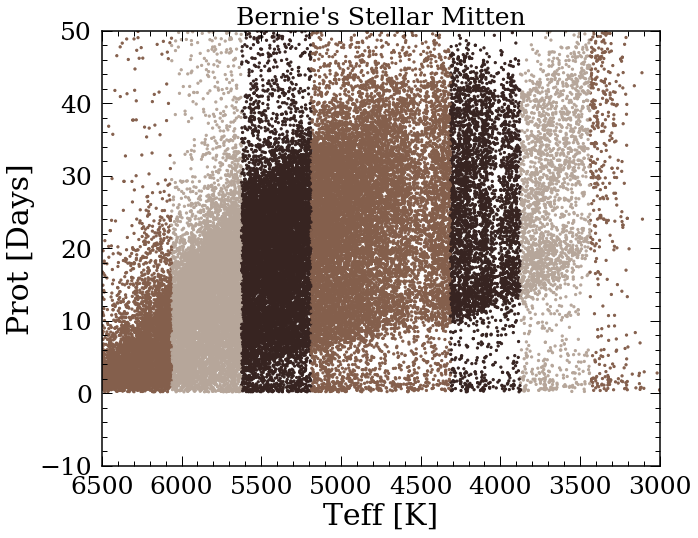

In [78]:
allprot=pd.read_pickle('../../Data/keplerProt.pkl')
plt.figure(figsize=(10,8))
plt.scatter(allprot['Teff'],allprot['Prot'],c=allprot['Teff'],cmap=newcmp,s=5,vmin=3000,vmax=6500)
plt.xlim([3000,6500])
plt.ylim([-10,50])
plt.gca().invert_xaxis()
plt.xlabel('Teff [K]')
plt.ylabel('Prot [Days]')
plt.title("Bernie's Stellar Mitten",fontsize=25)
